In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense , Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train),( X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


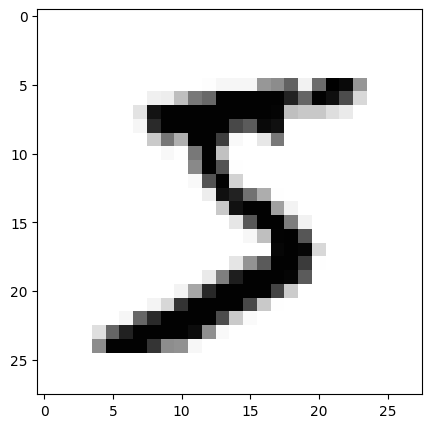

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [22]:
for x in X_train[0]:
    for i in x:
        print('{:3d}'.format(i),end='')
    print()
print(X_train.dtype)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [23]:
print(np.unique(y_train))  #타겟 (클래스가 10개 확인)

[0 1 2 3 4 5 6 7 8 9]


In [26]:
#컨볼루션 신경망 설정
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28,28,1),activation='relu'))
# model.add(Conv2D(32,(3, 3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [27]:
#모델의 실행 옵션 설정
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_path='./data/model/new/mnist_cnn.hdf5'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=0, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, batch_size=200,validation_split=0.25,epochs=1000,
                    verbose=0,callbacks=[checkpoint,early_stopping])

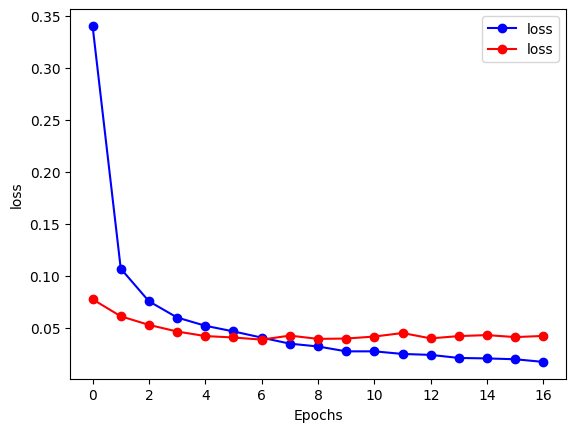

학습정확도: 0.9937777519226074
검증정확도: 0.989799976348877
테스트정확도: 0.9919000267982483


In [34]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_loss,label='loss',color='blue',marker='o')
plt.plot(x_len,y_vloss,label='loss',color='red',marker='o')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

#학습정확도,검증 정확도, 테스트 정확도 출력
print('학습정확도:',history.history['accuracy'][-1])
print('검증정확도:',history.history['val_accuracy'][-1])
print('테스트정확도:',model.evaluate(X_test,y_test,verbose=0)[1])


